<a href="https://colab.research.google.com/github/merajf/merajf.github.io/blob/main/Assignment_2_DL_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Images of Cats and Dogs



Download the zip files containg the images.  The training data ad the test data are stored in 2 separate zip files

In [ ]:
!pip install --upgrade --q --no-cache-dir gdown

In [ ]:
!gdown 1TA5sN9FABWVvxEn-BCGiuSggI7A0sddo

Downloading...
From: https://drive.google.com/uc?id=1TA5sN9FABWVvxEn-BCGiuSggI7A0sddo
To: /content/dogs-vs-cats-vvsmall.zip
100% 178M/178M [00:03<00:00, 46.1MB/s]


In [ ]:
# load the libraries
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras
import cv2
from keras import layers
from tensorflow.keras import regularizers


In [ ]:
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

from  IPython import display
import pathlib
import shutil
import tempfile


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-dxkjzfbh
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-dxkjzfbh
  Resolved https://github.com/tensorflow/docs to commit 36b0a7de4c3b2e0e06f03c0f56588e8fd155d63c
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=179186 sha256=ec9ef2ac23904422936c1560d20ccbae41f7815ca9b2cfb265c5974a969b37b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-bi2r597g/wheels/fc/f8/3b/5d21409a59cb1be9b1ade11f682039ced75b84de9dd6a0c8de
Successfully built tensorflow-docs


Extract the data

In [ ]:
# extract the training data into a directory
local_zip = '/content/dogs-vs-cats-vvsmall.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp//dogs-vs-cats')

In [ ]:
!unzip '/content/dogs-vs-cats-vvsmall'

Streaming output truncated to the last 5000 lines.
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.822.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.823.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.824.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.825.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.826.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.827.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.828.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.829.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.83.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.830.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.831.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.832.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.833.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.834.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.835.jpg  
  inflating: dogs-vs-cats-vvsmall/train/cats/cat.836.jpg  
  infl

In [ ]:
# Directory with our training horse pictures for training
train_cats_dir = os.path.join('dogs-vs-cats-vvsmall/train/cats')

# Directory with our training human pictures for training
train_dogs_dir = os.path.join('dogs-vs-cats-vvsmall/train/dogs')

# Directory with our training horse pictures for validation
validation_cats_dir = os.path.join('dogs-vs-cats-vvsmall/validation/cats')

# Directory with our training human pictures for validation
validation_dogs_dir = os.path.join('dogs-vs-cats-vvsmall/validation/dogs')

#Data Exploration

In [ ]:
# print out the names of the first 10 files to give a nice feeling that the files are arranged as expected
# i.e. images of horses in the horses folder and images of humans in the human folder
train_cats_names = os.listdir(train_cats_dir)
print(train_cats_names[:10])

train_dogs_names = os.listdir(train_dogs_dir)
print(train_dogs_names[:10])

validation_cats_names = os.listdir(validation_cats_dir)
print(validation_cats_names[:10])

validation_dogs_names = os.listdir(validation_dogs_dir)
print(validation_dogs_names[:10])

['cat.980.jpg', 'cat.739.jpg', 'cat.954.jpg', 'cat.1338.jpg', 'cat.1661.jpg', 'cat.332.jpg', 'cat.3.jpg', 'cat.2080.jpg', 'cat.2283.jpg', 'cat.1895.jpg']
['dog.2413.jpg', 'dog.2065.jpg', 'dog.2702.jpg', 'dog.933.jpg', 'dog.2480.jpg', 'dog.2836.jpg', 'dog.2167.jpg', 'dog.116.jpg', 'dog.1661.jpg', 'dog.528.jpg']
['cat.9017.jpg', 'cat.8914.jpg', 'cat.8578.jpg', 'cat.8918.jpg', 'cat.8924.jpg', 'cat.9286.jpg', 'cat.9117.jpg', 'cat.8781.jpg', 'cat.9218.jpg', 'cat.9210.jpg']
['dog.8742.jpg', 'dog.8780.jpg', 'dog.9053.jpg', 'dog.8783.jpg', 'dog.9261.jpg', 'dog.9200.jpg', 'dog.8976.jpg', 'dog.9191.jpg', 'dog.8674.jpg', 'dog.9294.jpg']


In [ ]:
# print out the number of images in the directories
print('total training cats images:', len(os.listdir(train_cats_dir)))
print('total training dogs images:', len(os.listdir(train_dogs_dir)))
print('total validation cats images:', len(os.listdir(validation_cats_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))

total training cats images: 3000
total training dogs images: 3000
total validation cats images: 900
total validation dogs images: 900


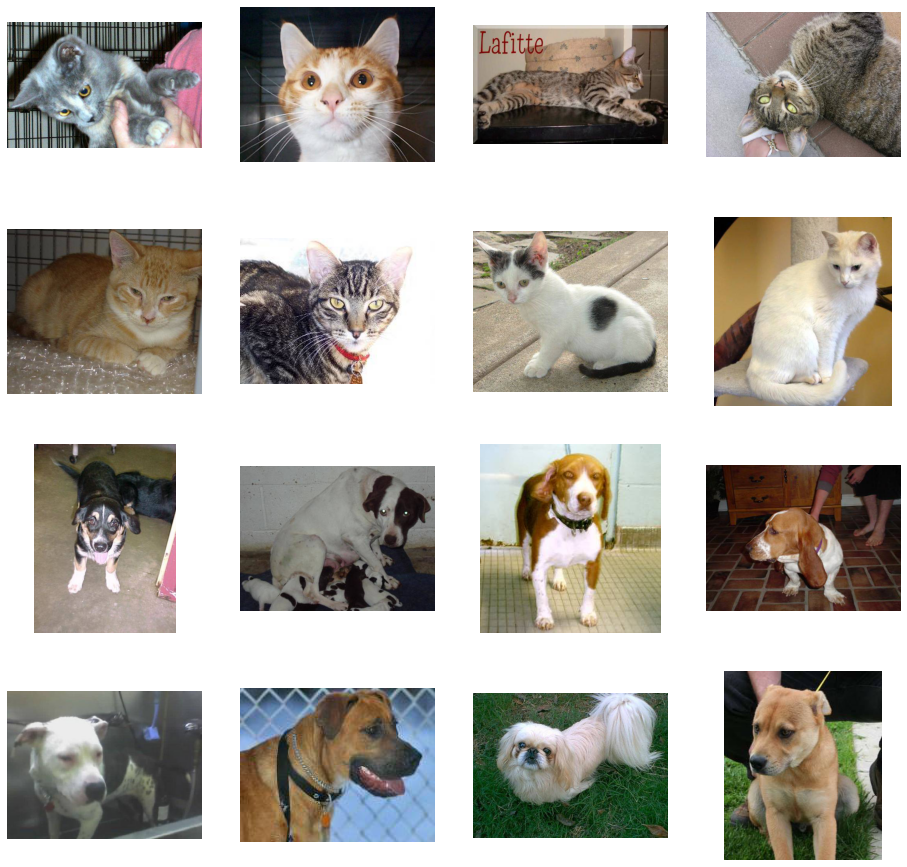

In [ ]:
# display images from the dataset
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
# pick the first 8 cat pictures
#[print(e) for e in myList]
# for e in myList:
#    print(e)
next_cats_pix = [os.path.join(train_cats_dir, fname) for fname in train_cats_names[pic_index-8:pic_index]]

# pick the first 8 dog pictures
next_dogs_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_names[pic_index-8:pic_index]]

# add the horse and human pictures together in a list and plot in
# the specified number of rows and columns
for i, img_path in enumerate(next_cats_pix+next_dogs_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


#Data Preparation
Normalise the images, grayscale and re-size them to the same size

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 30 using train_datagen generator
train_generator1 = train_datagen.flow_from_directory(
        '/content/dogs-vs-cats-vvsmall/train',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100x100
        batch_size=100,
        color_mode="grayscale",
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 30 using train_datagen generator
validation_generator1 = validation_datagen.flow_from_directory(
        '/content/dogs-vs-cats-vvsmall/validation',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100x100
        batch_size=100,
        color_mode="grayscale",
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

#arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


## Model Base Configuration

In [ ]:
STEPS_PER_EPOCH = 6000//100 ##Train size divided by batch size

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

optimizer=get_optimizer()

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

optimizer=get_optimizer()

In [ ]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=10),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

In [ ]:
def compile_and_fit(model, name, optimizer=None, max_epochs=40):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=False, name='binary_crossentropy'),
                  'accuracy'])

  model.summary()

  history = model.fit(
    train_generator1,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_data=validation_generator1,
    callbacks=get_callbacks(name),
    verbose=1)
  return history

In [ ]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

##Baseline Model

In [ ]:
base_model1 = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', input_shape=(100,100,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=1,activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [ ]:
size_histories = {}

size_histories['base1'] = compile_and_fit(base_model1, 'sizes/base1')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

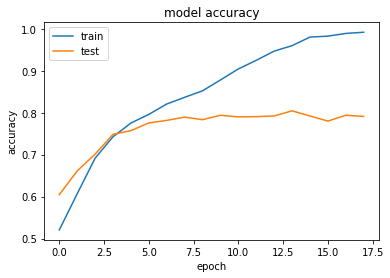

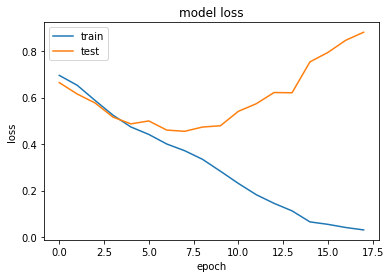

In [ ]:

# summarize the history for accuracy
plt.plot(size_histories['base1'].history['accuracy'])
plt.plot(size_histories['base1'].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(size_histories['base1'].history['loss'])
plt.plot(size_histories['base1'].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
base_model1.save("DLassign2_base_model1.h5")

In [ ]:
seed =100

# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow) 

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)


Text(0.5, 0, 'Epochs [Log Scale]')

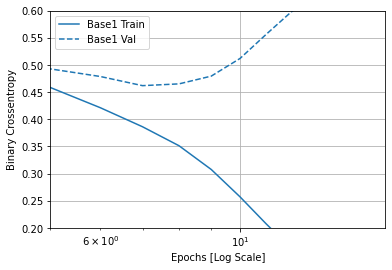

In [ ]:
plotter.plot(size_histories)
a = plt.xscale('log')
plt.xlim([5, max(plt.xlim())])
plt.ylim([0.2, 0.6])
plt.xlabel("Epochs [Log Scale]")

#Reducing Overfitting

##Dropout Model

In [ ]:
dropout_model1 = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', input_shape=(100,100,1)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.33),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.33),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=1,activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.33),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.33),
    layers.Dense(1,activation='sigmoid')
])

In [ ]:
size_histories = {}

size_histories['dropout1'] = compile_and_fit(dropout_model1, 'sizes/dropout1')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 49, 49, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 23, 23, 64)       

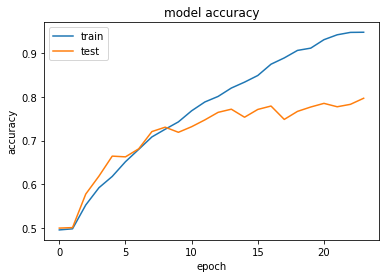

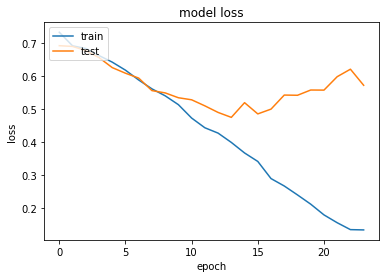

In [ ]:

# summarize the history for accuracy
plt.plot(size_histories['dropout1'].history['accuracy'])
plt.plot(size_histories['dropout1'].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(size_histories['dropout1'].history['loss'])
plt.plot(size_histories['dropout1'].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

##L2 Regularization Model

In [ ]:
l2_model1 = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', input_shape=(100,100,1), kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=1,activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    #layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

In [ ]:
size_histories = {}

size_histories['l21'] = compile_and_fit(l2_model1, 'sizes/l21')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 10, 10, 128)     

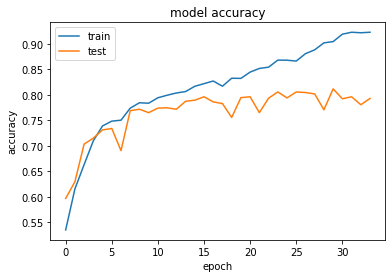

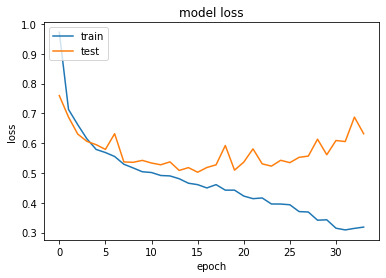

In [ ]:

# summarize the history for accuracy
plt.plot(size_histories['l21'].history['accuracy'])
plt.plot(size_histories['l21'].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(size_histories['l21'].history['loss'])
plt.plot(size_histories['l21'].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

##Combined Model

In [ ]:
combined_model = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', input_shape=(100,100,1), kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.33),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.33),    
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=1,activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2,2),   
    layers.Flatten(),
    layers.Dropout(0.33),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.33),    
    layers.Dense(1,activation='sigmoid')
])

In [ ]:
combined_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 64)        0

In [ ]:
size_histories = {}

size_histories['combined'] = compile_and_fit(combined_model, 'sizes/combined')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 64)        0

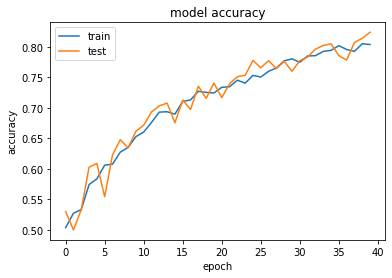

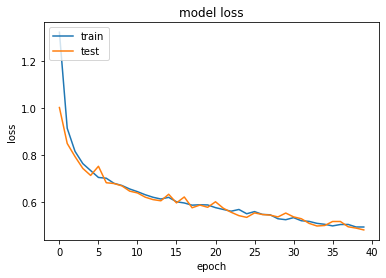

In [ ]:

# summarize the history for accuracy
plt.plot(size_histories['combined'].history['accuracy'])
plt.plot(size_histories['combined'].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(size_histories['combined'].history['loss'])
plt.plot(size_histories['combined'].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Text(0.5, 0, 'Epochs [Log Scale]')

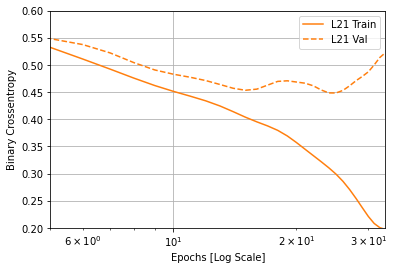

In [ ]:
plotter.plot(size_histories)
a = plt.xscale('log')
plt.xlim([5, max(plt.xlim())])
plt.ylim([0.2, 0.6])
plt.xlabel("Epochs [Log Scale]")

In [ ]:
seed =100

# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow) 

##Hyperband Tuner

In [ ]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.2 MB/s eta 0:00:00


In [ ]:
import keras_tuner

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(100,100,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
        keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(1, activation='sigmoid')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
  return model

build_model(keras_tuner.HyperParameters())

In [ ]:
tuner = keras_tuner.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=30,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')
     

In [ ]:
tuner.search(train_generator1, epochs=30, validation_data=(validation_generator1))

Trial 28 Complete [00h 03m 54s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.7061111330986023
Total elapsed time: 00h 36m 05s


In [ ]:
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 48)        480       
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        38432     
                                                                 
 conv2d_2 (Conv2D)           (None, 92, 92, 80)        23120     
                                                                 
 flatten (Flatten)           (None, 677120)            0         
                                                                 
 dense (Dense)               (None, 48)                32501808  
                                                                 
 dense_1 (Dense)             (None, 1)                 49        
                                                                 
Total params: 32,563,889
Trainable params: 32,563,889
No

Combining results from the tuner with our previously combined model structure

In [ ]:
hyperband_combined_model = tf.keras.Sequential([
    layers.Conv2D(filters=48, kernel_size=(3,3), strides=1,activation='relu', input_shape=(100,100,1), kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.33),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.33),    
    layers.Conv2D(filters=80, kernel_size=(3,3), strides=1,activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2,2),   
    layers.Flatten(),
    layers.Dropout(0.33),
    layers.Dense(48, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.33),    
    layers.Dense(1,activation='sigmoid')
])

In [ ]:
hyperband_combined_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 48)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        13856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 32)        0

In [ ]:
size_histories = {}

size_histories['hyberband_combined'] = compile_and_fit(hyperband_combined_model, 'sizes/hyberband_combined')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 48)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        13856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 32)        0

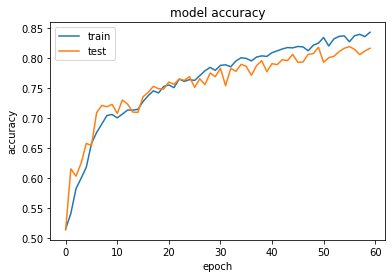

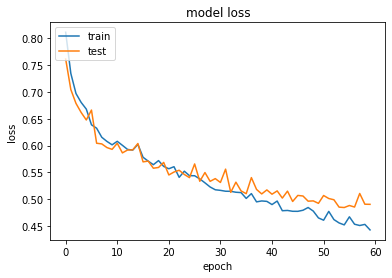

In [ ]:

# summarize the history for accuracy
plt.plot(size_histories['hyberband_combined'].history['accuracy'])
plt.plot(size_histories['hyberband_combined'].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(size_histories['hyberband_combined'].history['loss'])
plt.plot(size_histories['hyberband_combined'].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Leveraging ImageNet (Transfer Learning)

Colour image and different image size (96, 128, 160, 192, 224) is required for this, hence need to prepare images again

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 30 using train_datagen generator
train_generator2 = train_datagen.flow_from_directory(
        '/content/dogs-vs-cats-vvsmall/train',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 300x300
        batch_size=100,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 30 using train_datagen generator
validation_generator2 = validation_datagen.flow_from_directory(
        '/content/dogs-vs-cats-vvsmall/validation',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 300x300
        batch_size=100,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

#arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
seed =100

# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow) 

In [ ]:
# create our model without the classification part
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,      
    weights='imagenet',     
    classes=1,             
    classifier_activation="sigmoid",
)

# We don't want to re-train the base part of the model, so set trainable to false
base_model.trainable = False

from keras.layers import Flatten, Dense, Dropout
from keras import Sequential

# Create the transfer model
model = Sequential()    # create a blank transfer model
model.add(base_model)   # add base pretrained model to our transfer model
model.add(Flatten())    # add flatten layer so we can add the fully connected layer later
# add layers here for your transfer model
# can be whatever you want, just some extra flat layers
# or before the flatten layer you could add more convolutional layers, then flatten later on
# can also add drouput layer etc...
Dropout(0.33) 
model.add(Dense(1, activation='sigmoid'))  # add the output layer
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_6 (Flatten)         (None, 62720)             0         
                                                                 
 dense_5 (Dense)             (None, 1)                 62721     
                                                                 
Total params: 2,320,705
Trainable params: 62,721
Non-trainable params: 2,257,984
_________________________________________________________________


Epoch 1/10
60/60 [==============================] - 32s 477ms/step - loss: 0.2026 - accuracy: 0.9613 - val_loss: 0.2848 - val_accuracy: 0.9617
Epoch 2/10
60/60 [==============================] - 28s 460ms/step - loss: 0.0272 - accuracy: 0.9940 - val_loss: 0.1943 - val_accuracy: 0.9750
Epoch 3/10
60/60 [==============================] - 28s 459ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.1803 - val_accuracy: 0.9756
Epoch 4/10
60/60 [==============================] - 28s 463ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.1767 - val_accuracy: 0.9794
Epoch 5/10
60/60 [==============================] - 28s 464ms/step - loss: 3.2985e-04 - accuracy: 0.9998 - val_loss: 0.1712 - val_accuracy: 0.9822
Epoch 6/10
60/60 [==============================] - 28s 462ms/step - loss: 9.6812e-05 - accuracy: 1.0000 - val_loss: 0.1723 - val_accuracy: 0.9817
Epoch 7/10
60/60 [==============================] - 28s 467ms/step - loss: 2.1664e-05 - accuracy: 1.0000 - val_loss: 0.1721 - val_accu

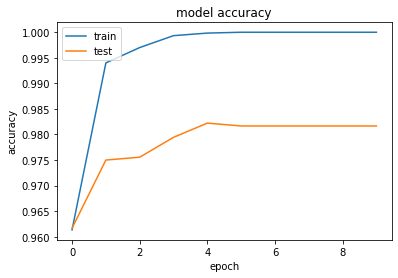

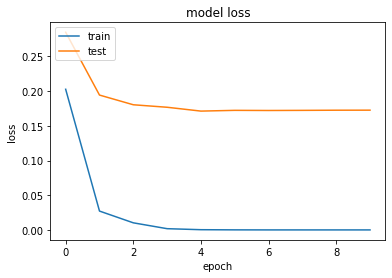

In [ ]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(
    train_generator2,
    validation_data=validation_generator2,
    batch_size=32,
    epochs=10,
    verbose=1,
    shuffle=True)

# summarize the history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# create our model without the classification part
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,      
    weights='imagenet',     
    classes=1,             
    classifier_activation="sigmoid",
)

# We don't want to re-train the base part of the model, so set trainable to false
base_model.trainable = False

from keras.layers import Flatten, Dense, Dropout
from keras import Sequential

# Create the transfer model
model = Sequential()    # create a blank transfer model
model.add(base_model)   # add base pretrained model to our transfer model
model.add(Flatten())    # add flatten layer so we can add the fully connected layer later
# add layers here for your transfer model
# can be whatever you want, just some extra flat layers
# or before the flatten layer you could add more convolutional layers, then flatten later on
# can also add drouput layer etc...
Dropout(0.33) 
model.add(Dense(1, activation='sigmoid'))  # add the output layer
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 62721     
                                                                 
Total params: 2,320,705
Trainable params: 62,721
Non-trainable params: 2,257,984
_________________________________________________________________


Epoch 1/10
60/60 [==============================] - 31s 467ms/step - loss: 0.1959 - accuracy: 0.9643 - val_loss: 0.1983 - val_accuracy: 0.9700
Epoch 2/10
60/60 [==============================] - 28s 472ms/step - loss: 0.0292 - accuracy: 0.9938 - val_loss: 0.2145 - val_accuracy: 0.9733
Epoch 3/10
60/60 [==============================] - 28s 466ms/step - loss: 0.0195 - accuracy: 0.9953 - val_loss: 0.1986 - val_accuracy: 0.9772
Epoch 4/10
60/60 [==============================] - 28s 460ms/step - loss: 0.0095 - accuracy: 0.9977 - val_loss: 0.2535 - val_accuracy: 0.9733
Epoch 5/10
60/60 [==============================] - 28s 462ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.2262 - val_accuracy: 0.9778
Epoch 6/10
60/60 [==============================] - 28s 461ms/step - loss: 1.0324e-04 - accuracy: 1.0000 - val_loss: 0.2319 - val_accuracy: 0.9783
Epoch 7/10
60/60 [==============================] - 28s 463ms/step - loss: 1.6861e-05 - accuracy: 1.0000 - val_loss: 0.2283 - val_accuracy

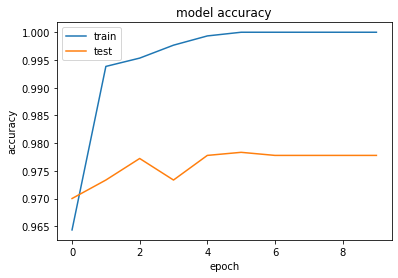

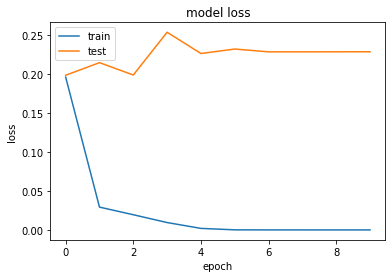

In [ ]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(
    train_generator2,
    validation_data=validation_generator2,
    batch_size=32,
    epochs=10,
    verbose=1,
    shuffle=True)

# summarize the history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

##Try uploading image to check if cat or dog

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a cat")
  else:
    print(fn + " is a dog")

Saving 14.jpg to 14.jpg
Saving 15.jpg to 15.jpg
1/1 [==============================] - 0s 24ms/step
[0.05847191]
14.jpg is a dog
1/1 [==============================] - 0s 24ms/step
[0.24501272]
15.jpg is a dog
